# Saving and Loading dfencoder Models
This demonstrates how to serialize dfencoder models for saving and loading, using the [adult census dataset](https://archive.ics.uci.edu/ml/datasets/adult) as in the [demo notebook](demo.ipynb).

In [1]:
#Take all the code from the demo notebook...
from dfencoder import AutoEncoder
import numpy as np
import pandas as pd

#and, for pretty visualiations...
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('https://github.com/AlliedToasters/dfencoder/raw/master/adult.csv')

#this dataset contains nulls and ' ?'. Let's make these all nulls.
df = df.applymap(lambda x: np.nan if x==' ?' else x)

In [3]:
train = df.sample(frac=.8, random_state=42)
test = df.loc[~df.index.isin(train.index)]

X_train = train
X_val = test

In [4]:
#define the model...
model = AutoEncoder(
    encoder_layers = [512, 512, 512], #model architecture
    decoder_layers = [], #decoder optional - you can create bottlenecks if you like
    activation='relu',
    swap_p=0.2, #noise parameter
    lr = 0.01,
    lr_decay=.99,
    batch_size=512,
    logger='ipynb', #special logging for jupyter notebooks
    verbose=False,
    optimizer='sgd',
    scaler='gauss_rank', #gauss rank scaling forces your numeric features into standard normal distributions
    min_cats=3 #Define cutoff for minority categories, default 10
)

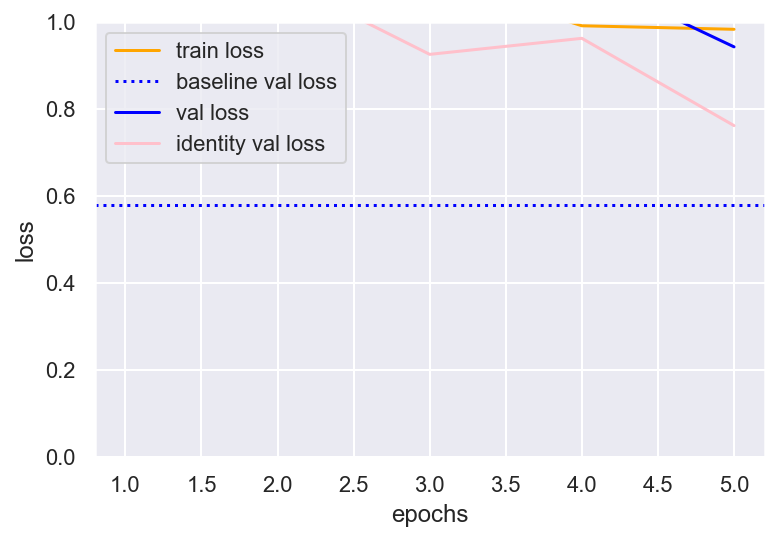

In [5]:
#train the model for 5 epochs...
model.fit(X_train, epochs=5, val=X_val)

# Saving a Model with Dill
Unfortunately we can't just pickle and save a model. However, there is a library called `dill` that can do it for us. As long as you have `dill` (and `dfencoder`) installed in your python environment, the following code should work to save your model.

In [6]:
import dill

with open('my_model.pkl', 'wb') as f:
    serialized_model = dill.dumps(model)
    f.write(serialized_model)

If that worked correctly, a file in the local directory named "my_model.pkl" should have been written; that's your saved model (you can use whatever extension you like; .pkl could be misleading as it's not a true pickle.)

# Loading a Model with Dill
To reload the model, you'll need to use Dill again:

In [7]:
with open('my_model.pkl', 'rb') as f:
    loaded_serialized_model = f.read()
    loaded_model = dill.loads(loaded_serialized_model)

After loading the model, we can continue to use it as we would normally:

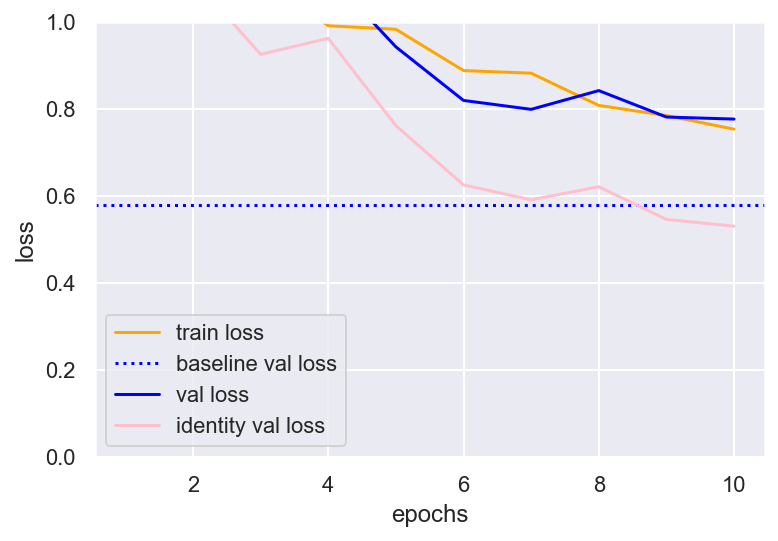

In [8]:
#train the loaded model for 5 more epochs...
loaded_model.fit(X_train, epochs=5, val=X_val)

# Sorry this isn't Nicer!
If I had more time I would write in a nicer API for saving and loading models. I hope this works for the reader in the meantime!!